In [1]:
# Данные тут
# https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
# 


import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

display(pd.__version__)
display(matplotlib.__version__)
display(sns.__version__)

'2.3.1'

'3.10.0'

'0.13.2'

In [4]:
temp=pd.read_csv('data/Fremont_Bridge_Bicycle_Counter.csv')
display(temp.head(3))
display(temp.tail(3))
temp.info()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0


,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
141419,04/30/2021 09:00:00 PM,34.0,14.0,20.0
141420,04/30/2021 10:00:00 PM,34.0,13.0,21.0
141421,04/30/2021 11:00:00 PM,36.0,12.0,24.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141422 entries, 0 to 141421
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          141422 non-null  object 
 1   Fremont Bridge Total          141400 non-null  float64
 2   Fremont Bridge East Sidewalk  141400 non-null  float64
 3   Fremont Bridge West Sidewalk  141400 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.3+ MB


In [7]:
df = pd.read_csv('data/Fremont_Bridge_Bicycle_Counter.csv',
                 index_col='Date', 
                 parse_dates = True).sort_index()
#### нельзя просто удалить дубликаты, произойдет удаление одинакового содержания вместе с различными индексами!!!
#### нужно удалять ИМЕННО одинаковае индексы
display(df[df.index.duplicated(keep='last')])

df = df[~df.index.duplicated(keep='last')]

######### 2021 ПАНДЕМИЯ
df = df.loc[:'2020']
df

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gp/T/ipykernel_75254/3184411798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/Fremont_Bridge_Bicycle_Counter.csv',


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-04-30 19:00:00,156.0,68.0,88.0
2020-04-30 20:00:00,51.0,30.0,21.0
2020-04-30 21:00:00,25.0,17.0,8.0


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-12-31 19:00:00,27.0,11.0,16.0
2020-12-31 20:00:00,18.0,9.0,9.0
2020-12-31 21:00:00,18.0,9.0,9.0


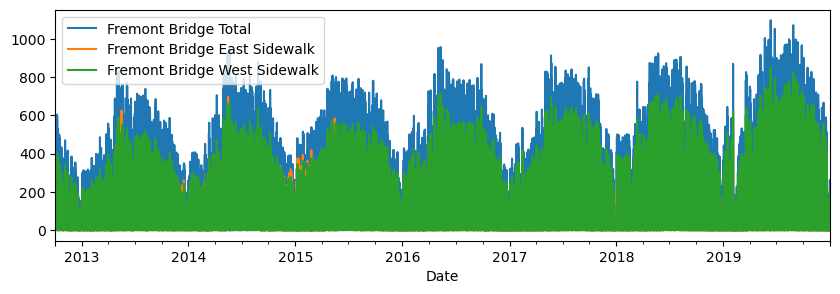

In [8]:
# 2020 ПАНДЕМИЯ
df = df.loc[:'2019']
df.plot(figsize = (10,3));

In [9]:
display(df.head(5))
display(df.tail(5))
df.info()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-12-31 19:00:00,19.0,8.0,11.0
2019-12-31 20:00:00,13.0,6.0,7.0
2019-12-31 21:00:00,15.0,8.0,7.0
2019-12-31 22:00:00,15.0,5.0,10.0
2019-12-31 23:00:00,16.0,7.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63504 entries, 2012-10-03 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fremont Bridge Total          63494 non-null  float64
 1   Fremont Bridge East Sidewalk  63494 non-null  float64
 2   Fremont Bridge West Sidewalk  63494 non-null  float64
dtypes: float64(3)
memory usage: 1.9 MB


In [10]:
(df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']).sum()

10

In [11]:
df[df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


In [12]:
df[df.isna().any(axis=1)]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


<Axes: xlabel='Date'>

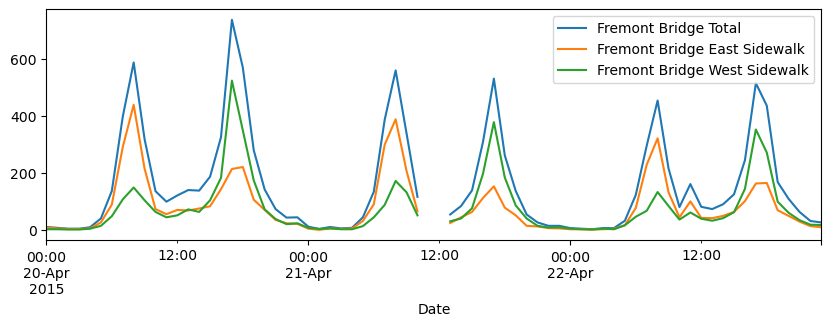

In [13]:
df.loc['2015-04-20':'2015-04-22'].plot(figsize = (10,3))

In [14]:
dfi = df.interpolate(method='piecewise_polynomial', axis=0);

In [15]:
(dfi['Fremont Bridge East Sidewalk'] + dfi['Fremont Bridge West Sidewalk'] != dfi['Fremont Bridge Total']).sum()

0

In [16]:
# все правильно?
# точно?

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-04-21 09:00:00,339.000000,207.000000,132.0
2015-04-21 10:00:00,116.000000,65.000000,51.0
2015-04-21 11:00:00,95.333333,51.333333,44.0
2015-04-21 12:00:00,74.666667,37.666667,37.0
2015-04-21 13:00:00,54.000000,24.000000,30.0
2015-04-21 14:00:00,84.000000,44.000000,40.0
2015-04-21 15:00:00,139.000000,63.000000,76.0


<Axes: xlabel='Date'>

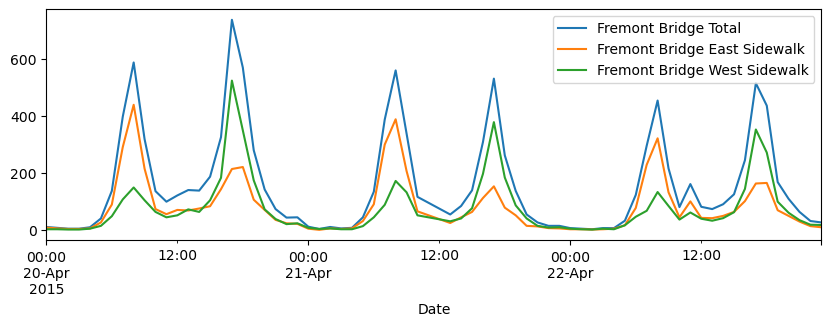

In [17]:
display(dfi.loc['2015-04-21 09:00:00':'2015-04-21 15:00:00'])
dfi.loc['2015-04-20':'2015-04-22'].plot(figsize = (10,3))

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-04-21 09:00:00,339.0,207.0,132.0
2015-04-21 10:00:00,116.0,65.0,51.0
2015-04-21 11:00:00,95.0,51.0,44.0
2015-04-21 12:00:00,75.0,38.0,37.0
2015-04-21 13:00:00,54.0,24.0,30.0
2015-04-21 14:00:00,84.0,44.0,40.0
2015-04-21 15:00:00,139.0,63.0,76.0


<Axes: xlabel='Date'>

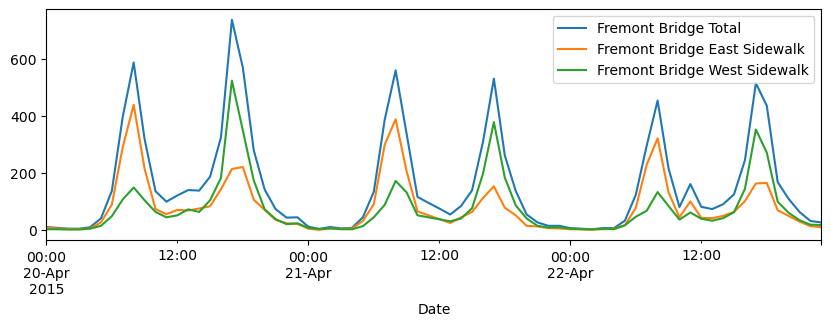

In [18]:
# возвращаемся к df и округляем значения
# помним, что по идее лучше заполнить соседними РАНЕЕ нашей даты днями, кстати почему РАНЕЕ, 
# а не познее???
df=dfi.round()
display(df.loc['2015-04-21 09:00:00':'2015-04-21 15:00:00'])
df.loc['2015-04-20':'2015-04-22'].plot(figsize = (10,3))

Наличие сезонности в году и общего тренда год от года

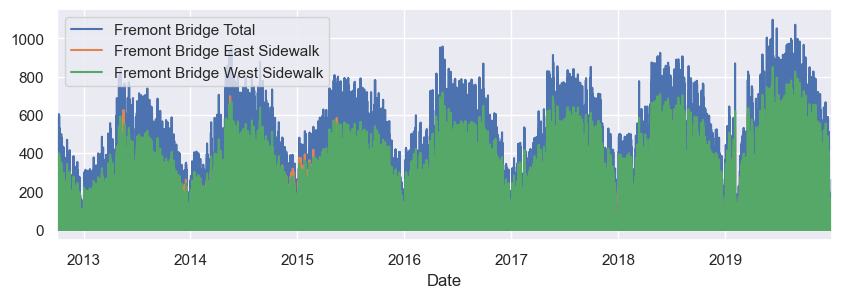

In [19]:
sns.set()
df.plot(figsize = (10,3));

Наличие более мелких зависимостей недельной и температурной (зима/лето)

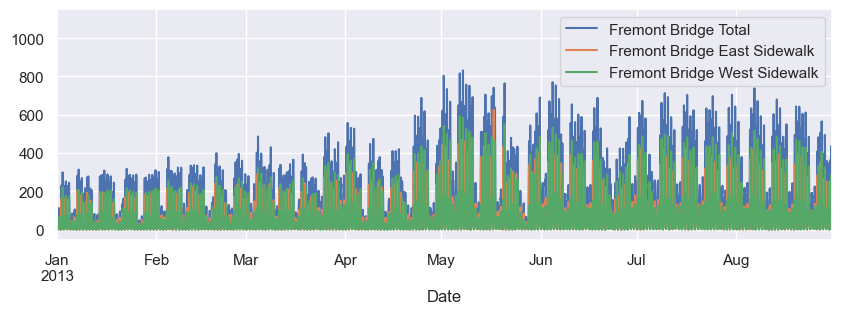

In [20]:
_=df.plot(figsize = (10,3));
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,8,31));

Наличие более мелких зависимостей недельной и температурной (зима/лето)
и выходных

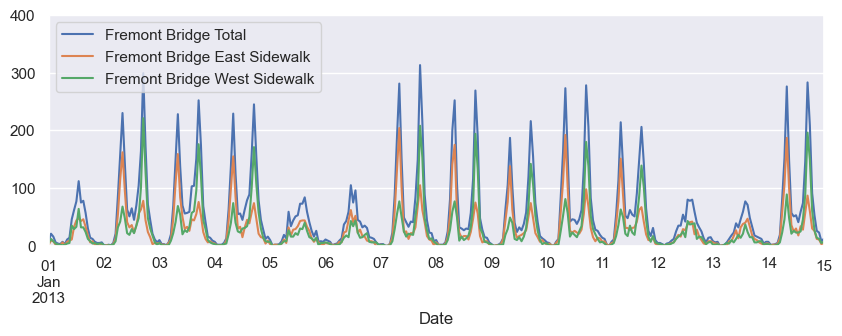

In [21]:
_=df.plot(figsize = (10,3))
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,1,15))
_.set_ylim(0,400);

Выявление зависимостей, на примере недельного агрегирования:
- **сильно** через сумму
- **слабо** через среднее

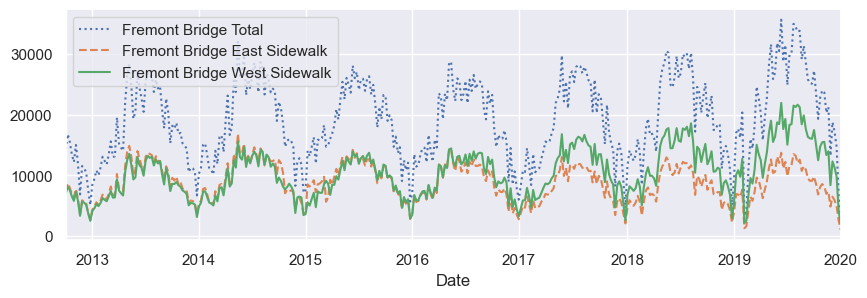

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0


In [22]:
weekly=df.resample('W').sum()
weekly.plot(style=[':','--','-'], figsize = (10,3));
plt.show()
display(weekly.head(3))

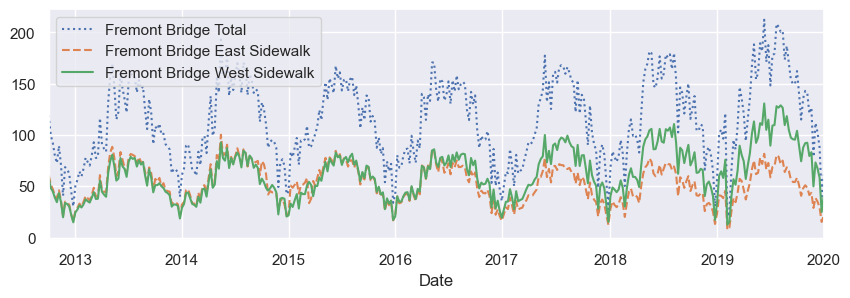

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,119.100000,60.808333,58.291667
2012-10-14,99.970238,51.660714,48.309524
2012-10-21,92.315476,47.297619,45.017857


In [23]:
weekly=df.resample('W').mean()
weekly.plot(style=[':','--','-'], figsize = (10,3));
plt.show()
display(weekly.head(3))

Cглаживание с переудом **30 отсчетов** с переносом результата в середину выборки

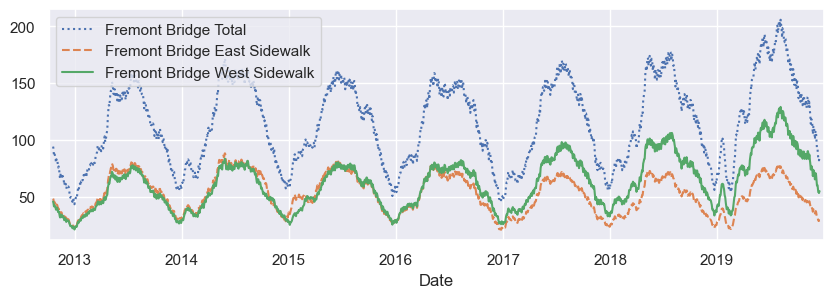

In [24]:
daily=df.resample('D').mean()
daily_mean=daily.rolling(30, center=True).mean()
daily_mean.plot(style=[':','--','-'], figsize = (10,3));

Cглаживание с переудом **30 дней** с переносом результата в середину выборки, увы на месяц так не работает

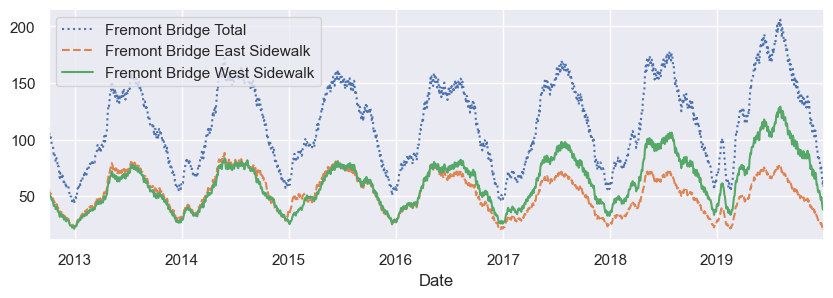

In [25]:
daily_d=df.resample('D').mean()
daily_d.head()
daily_mean_d=daily_d.rolling('30D', center=True).mean()
daily_mean_d.plot(style=[':','--','-'], figsize = (10,3));

Посмотрите какую разницу дает подход окна по отсчетам и датам!!!

In [26]:
display(daily_mean.head(30))
display(daily_mean_d.tail(30))

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN
2012-10-09,NaN,NaN,NaN
2012-10-10,NaN,NaN,NaN
2012-10-11,NaN,NaN,NaN


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-12-02,107.973611,37.359722,70.613889
2019-12-03,107.845833,37.302778,70.543056
2019-12-04,105.859722,36.693056,69.166667
2019-12-05,101.152778,35.037500,66.115278
2019-12-06,95.966667,33.394444,62.572222
2019-12-07,92.315278,32.365278,59.950000
2019-12-08,92.601389,32.240278,60.361111
2019-12-09,92.034722,31.875000,60.159722
2019-12-10,88.104167,30.643056,57.461111


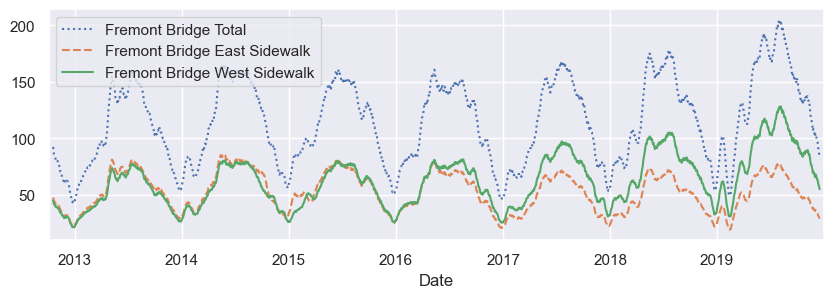

In [27]:
daily_gauss = daily.rolling(30, center=True, win_type='gaussian').mean(std=10)
daily_gauss.plot(style=[':','--','-'], figsize = (10,3));

Возьмем все года, месяцы и дни и сгрупируем по часам, но тут есть проблемка ... которая делает наше решение **абсалютно некорректным**.

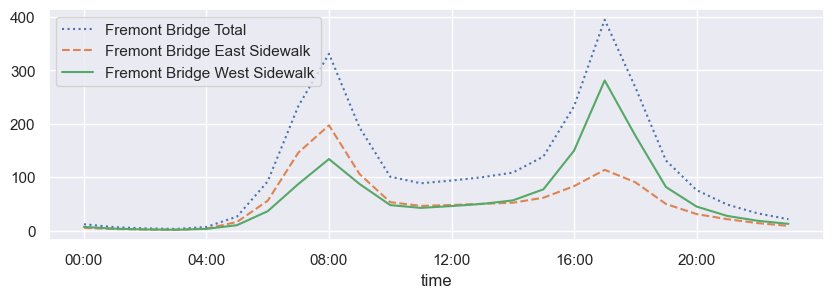

In [28]:
# красивые индексы времени
day_time=df.groupby(df.index.time).mean()
hourly_ticks=day_time.index.values[::4]
#hourly_ticks
g=day_time.plot(style=[':','--','-'], figsize = (10,3));
g.set_xticks(hourly_ticks);

Все-таки давайте посмотрим на неделю пристально

In [29]:
df.groupby(df.index.dayofweek).mean()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
0,134.126213,59.946869,74.179343
1,143.120370,64.251323,78.869048
2,142.068122,63.819444,78.248677
3,134.727072,60.921407,73.805666
4,121.493056,54.844687,66.648369
5,63.766975,32.163801,31.603175
6,60.837081,31.145944,29.691138


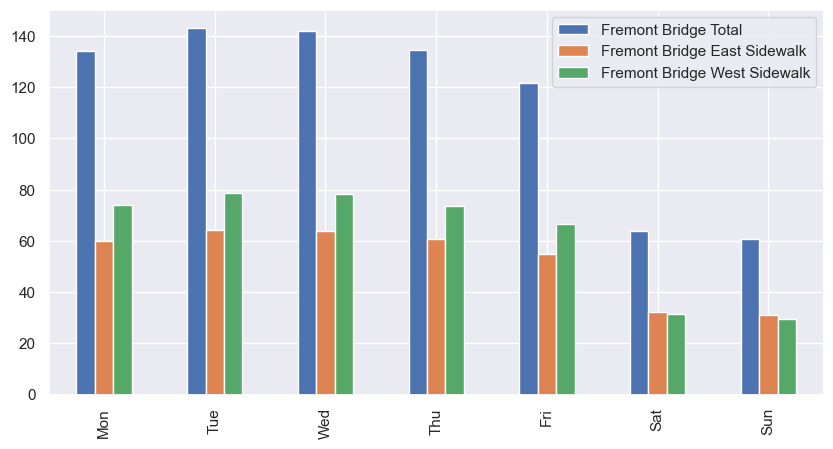

In [30]:
week_day=df.groupby(df.index.dayofweek).mean()
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_day.index=week_name
g=week_day.plot.bar(style=[':','--','-'], figsize = (10,5))

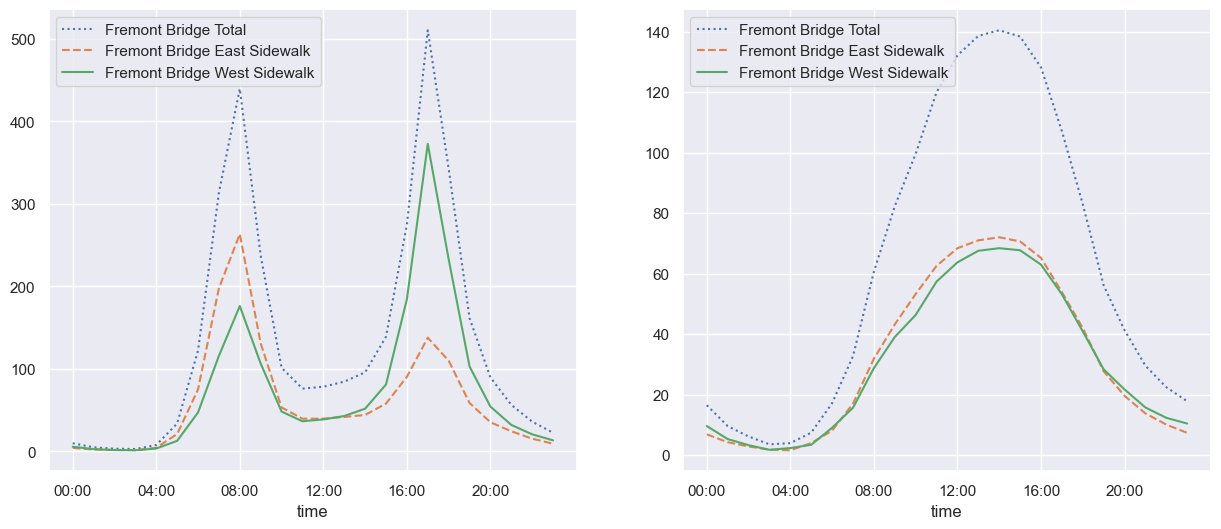

In [31]:
hourly_ticks=day_time.index.values[::4]
day_type=np.where(df.index.dayofweek<5,'Workday','Weekend')
by_day=df.groupby([day_type,df.index.time]).mean()

fig , ax = plt.subplots(1,2,figsize=(15,6))

by_day.loc['Workday'].plot(ax=ax[0],xticks=hourly_ticks,style=[':','--','-']);
by_day.loc['Weekend'].plot(ax=ax[1],xticks=hourly_ticks,style=[':','--','-']);

Крассивое визуализирование с учетом разброса данных относительно среднего

In [32]:
day_month=df.index.month
by_month_day=df.groupby([day_type, day_month, df.index.time]).mean()
display(by_month_day)
by_month_day.index.names

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
        Date                                                                
Weekend 1    00:00:00             10.000000                      4.283333   
             01:00:00              5.983333                      2.783333   
             02:00:00              3.600000                      1.766667   
             03:00:00              1.950000                      0.950000   
             04:00:00              2.366667                      1.066667   
...                                     ...                           ...   
Workday 12   19:00:00             74.720000                     23.068571   
             20:00:00             40.114286                     13.880000   
             21:00:00             26.457143                      9.840000   
             22:00:00             18.200000                      7.731429   
             23:00:00             11.902857                      4.914286   

                       Fremont Bridge West Sidewalk  
        Date                                         
Weekend 1    00:00:00                      5.716667  
             01:00:00                      3.200000  
             02:00:00                      1.833333  
             03:00:00                      1.000000  
             04:00:00                      1.300000  
...                                             ...  
Workday 12   19:00:00                     51.651429  
             20:00:00                     26.234286  
             21:00:00                     16.617143  
             22:00:00                     10.468571  
             23:00:00                      6.988571  

[576 rows x 3 columns]

FrozenList([None, 'Date', None])

In [33]:
by_month_day.index.names=['day','month','time']
by_month_day

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
day     month time                                                           
Weekend 1     00:00:00             10.000000                      4.283333   
              01:00:00              5.983333                      2.783333   
              02:00:00              3.600000                      1.766667   
              03:00:00              1.950000                      0.950000   
              04:00:00              2.366667                      1.066667   
...                                      ...                           ...   
Workday 12    19:00:00             74.720000                     23.068571   
              20:00:00             40.114286                     13.880000   
              21:00:00             26.457143                      9.840000   
              22:00:00             18.200000                      7.731429   
              23:00:00             11.902857                      4.914286   

                        Fremont Bridge West Sidewalk  
day     month time                                    
Weekend 1     00:00:00                      5.716667  
              01:00:00                      3.200000  
              02:00:00                      1.833333  
              03:00:00                      1.000000  
              04:00:00                      1.300000  
...                                              ...  
Workday 12    19:00:00                     51.651429  
              20:00:00                     26.234286  
              21:00:00                     16.617143  
              22:00:00                     10.468571  
              23:00:00                      6.988571  

[576 rows x 3 columns]

In [34]:
df_1=by_month_day.reset_index()
df_1.head()

,day,month,time,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,Weekend,1,00:00:00,10.000000,4.283333,5.716667
1,Weekend,1,01:00:00,5.983333,2.783333,3.200000
2,Weekend,1,02:00:00,3.600000,1.766667,1.833333
3,Weekend,1,03:00:00,1.950000,0.950000,1.000000
4,Weekend,1,04:00:00,2.366667,1.066667,1.300000


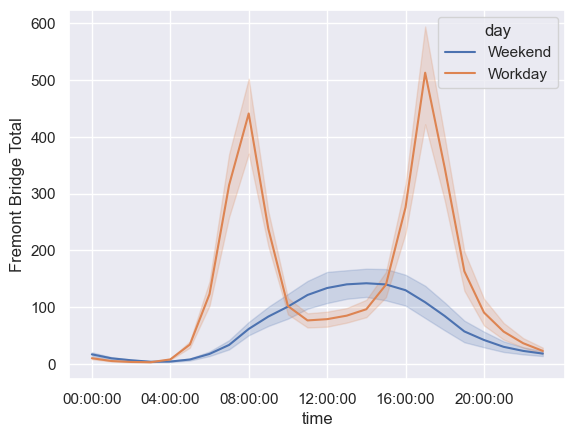

In [35]:
sns.lineplot(x = df_1['time'].astype(str), 
             y='Fremont Bridge Total', 
             hue = 'day', 
             data = df_1);
plt.xticks(hourly_ticks.astype(str)); # обратите внимание на преобразование типов переменных

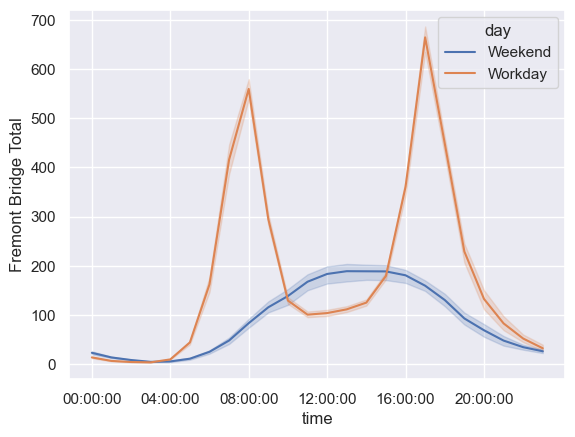

In [36]:
df_2 = df_1[df_1.month.isin([5,6,7,8,9])]
sns.lineplot( x=df_2['time'].astype(str), y='Fremont Bridge Total', hue='day', data=df_2)
plt.xticks(hourly_ticks.astype(str));

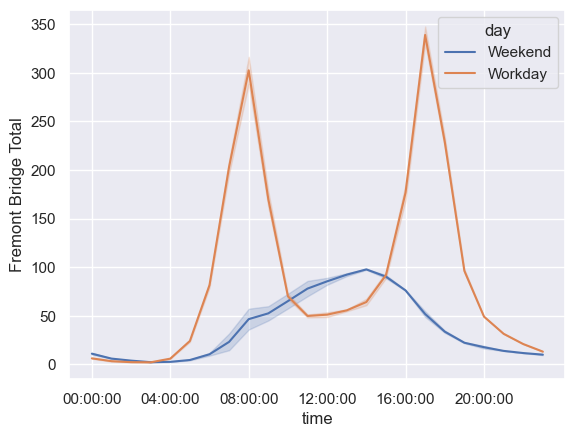

In [37]:
df_3 = df_1[df_1.month.isin([1,2])]
sns.lineplot( x=df_3['time'].astype(str), y='Fremont Bridge Total', hue='day', data=df_3, 
             estimator=np.median)
plt.xticks(hourly_ticks.astype(str));